In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data_path = 'bank.csv'
data = pd.read_csv(data_path, delimiter = ';')
data.drop(columns=['work_position', 'statement_id', 'job_is_official', 'income_sum_confirmed'], axis=1, inplace=True) # Removing useless and categorical feature
data.head()

,first_payment,credit_amount,credit_term,Income_norm,income_sum,month_payment,gender_norm,family_children,marriage,job_experience_year,job_general_experience_year,family_years,Education_norm,Age,Decision
0,25.4,1505135.00,60,0.38,100000,37800.0,1,1,1,16,40,32,2,59,1
1,45.6,2026699.39,36,0.08,335000,26060.0,1,0,1,4,14,8,4,37,1
2,80.0,608440.00,24,0.25,130000,32420.0,1,0,1,1,27,8,4,52,1
3,73.9,530000.00,60,0.09,150000,14000.0,0,0,1,4,10,37,4,65,1
4,30.9,1691240.00,84,0.24,150000,35536.3,0,1,1,5,20,12,2,43,0


# **Data analysis, transformation and preparation**

In [3]:
data.info() # Looking at the features from the nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75829 entries, 0 to 75828
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   first_payment                75829 non-null  float64
 1   credit_amount                75829 non-null  float64
 2   credit_term                  75829 non-null  int64  
 3   Income_norm                  75805 non-null  float64
 4   income_sum                   75829 non-null  int64  
 5   month_payment                75829 non-null  float64
 6   gender_norm                  75829 non-null  int64  
 7   family_children              75829 non-null  int64  
 8   marriage                     75829 non-null  int64  
 9   job_experience_year          75829 non-null  int64  
 10  job_general_experience_year  75829 non-null  int64  
 11  family_years                 75829 non-null  int64  
 12  Education_norm               75829 non-null  int64  
 13  Age             

In [4]:
data.describe()

,first_payment,credit_amount,credit_term,Income_norm,income_sum,month_payment,gender_norm,family_children,marriage,job_experience_year,job_general_experience_year,family_years,Education_norm,Age,Decision
count,75829.000000,7.582900e+04,75829.000000,75805.000000,7.582900e+04,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000,75829.000000
mean,44.593653,1.560930e+06,54.795606,0.465841,1.649018e+05,43546.930673,0.659972,0.695618,0.735748,6.869417,18.755028,10.117712,3.634216,41.949267,0.792744
std,23.061883,7.570951e+05,27.670361,6.424165,6.162293e+05,21953.874128,0.473721,0.878743,0.440937,6.759724,9.097406,10.366536,0.759662,9.597238,0.405343
min,0.000000,7.899000e+04,12.000000,0.000000,0.000000e+00,2675.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,23.700000,9.871160e+05,24.000000,0.190000,1.000000e+05,28860.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,4.000000,35.000000,1.000000
50%,45.600000,1.430000e+06,60.000000,0.280000,1.500000e+05,39600.000000,1.000000,0.000000,1.000000,5.000000,18.000000,8.000000,4.000000,41.000000,1.000000
75%,62.000000,2.009240e+06,84.000000,0.410000,2.000000e+05,52200.000000,1.000000,1.000000,1.000000,10.000000,25.000000,16.000000,4.000000,48.000000,1.000000
max,99.500000,6.163624e+06,96.000000,1590.000000,1.650005e+08,305987.950000,1.000000,6.000000,1.000000,40.000000,40.000000,40.000000,5.000000,124.000000,1.000000


In [5]:
data.head()

,first_payment,credit_amount,credit_term,Income_norm,income_sum,month_payment,gender_norm,family_children,marriage,job_experience_year,job_general_experience_year,family_years,Education_norm,Age,Decision
0,25.4,1505135.00,60,0.38,100000,37800.0,1,1,1,16,40,32,2,59,1
1,45.6,2026699.39,36,0.08,335000,26060.0,1,0,1,4,14,8,4,37,1
2,80.0,608440.00,24,0.25,130000,32420.0,1,0,1,1,27,8,4,52,1
3,73.9,530000.00,60,0.09,150000,14000.0,0,0,1,4,10,37,4,65,1
4,30.9,1691240.00,84,0.24,150000,35536.3,0,1,1,5,20,12,2,43,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
data_normalized = minmax_scaler.fit_transform(data)
data = pd.DataFrame(data_normalized, columns=data.columns)
data.head()

,first_payment,credit_amount,credit_term,Income_norm,income_sum,month_payment,gender_norm,family_children,marriage,job_experience_year,job_general_experience_year,family_years,Education_norm,Age,Decision
0,0.255276,0.234385,0.571429,0.000239,0.000606,0.115802,1.0,0.166667,1.0,0.400,1.000,0.800,0.4,0.368932,1.0
1,0.458291,0.320103,0.285714,0.000050,0.002030,0.077096,1.0,0.000000,1.0,0.100,0.350,0.200,0.8,0.155340,1.0
2,0.804020,0.087014,0.142857,0.000157,0.000788,0.098064,1.0,0.000000,1.0,0.025,0.675,0.200,0.8,0.300971,1.0
3,0.742714,0.074123,0.571429,0.000057,0.000909,0.037335,0.0,0.000000,1.0,0.100,0.250,0.925,0.8,0.427184,1.0
4,0.310553,0.264971,0.857143,0.000151,0.000909,0.108338,0.0,0.166667,1.0,0.125,0.500,0.300,0.4,0.213592,0.0


In [7]:
data['Decision'].value_counts()

Decision
1.0    60113
0.0    15716
Name: count, dtype: int64

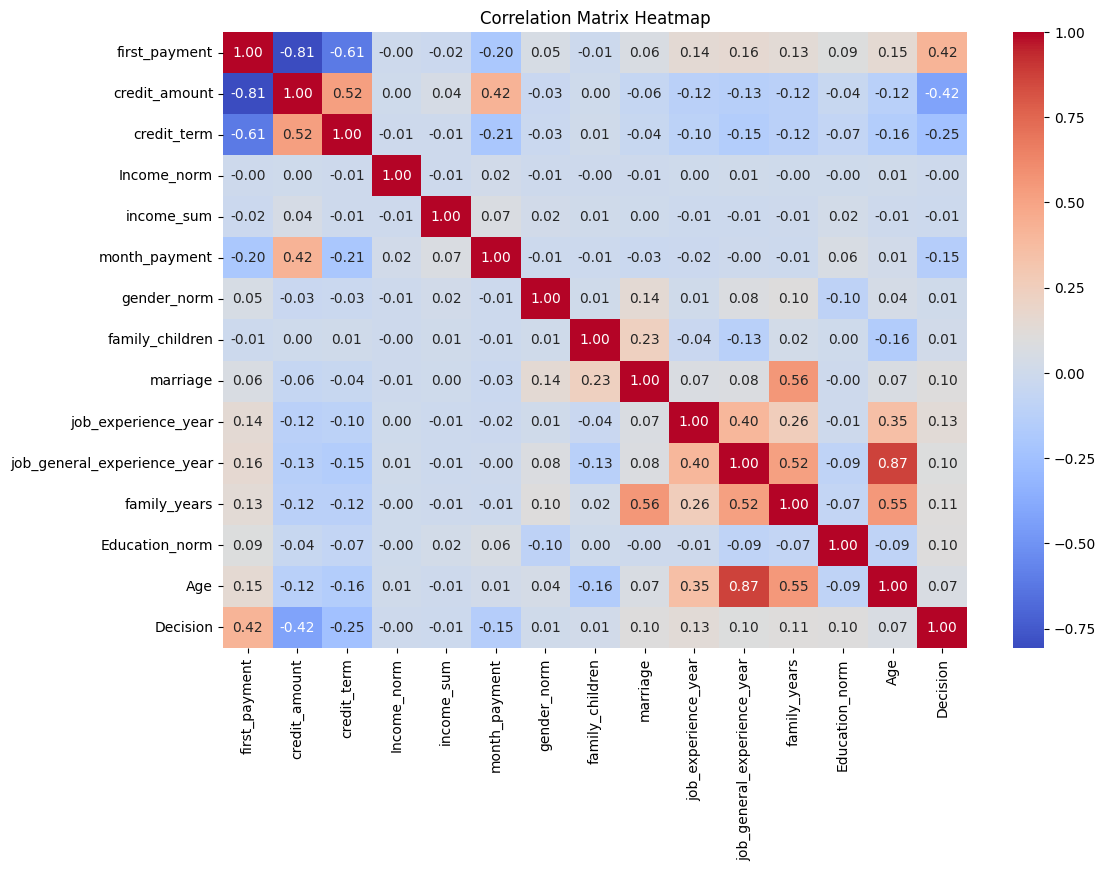

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
#drop the columns with the least correlation with 'Decision'

corr_matrix = data.corr()
corr_with_decision = corr_matrix['Decision'].abs()
least_corr_columns = corr_with_decision[corr_with_decision < 0.05].index
data.drop(columns=least_corr_columns, inplace=True)
print('Removed columns: ', least_corr_columns)

Removed columns:  Index(['Income_norm', 'income_sum', 'gender_norm', 'family_children'], dtype='object')


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75829 entries, 0 to 75828
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   first_payment                75829 non-null  float64
 1   credit_amount                75829 non-null  float64
 2   credit_term                  75829 non-null  float64
 3   month_payment                75829 non-null  float64
 4   marriage                     75829 non-null  float64
 5   job_experience_year          75829 non-null  float64
 6   job_general_experience_year  75829 non-null  float64
 7   family_years                 75829 non-null  float64
 8   Education_norm               75829 non-null  float64
 9   Age                          75829 non-null  float64
 10  Decision                     75829 non-null  float64
dtypes: float64(11)
memory usage: 6.4 MB


# Projet de Prédiction Conforme - Analyse et Implémentation

Ce notebook implémente et analyse des algorithmes de quantification d'incertitude via des techniques de prédiction conforme. 
Les étapes incluent : 
1. La création d'intervalles de prédiction pour la régression.
2. La création d'ensembles de prédiction pour la classification.
3. Analyse critique et comparaison des méthodes appliquées.


## 1. Intervalle de Prédiction par Régression Quantile

Dans cette section, nous allons implémenter une régression quantile pour créer un intervalle de prédiction.


In [12]:
y_regression = data['credit_amount']
train_regression = data.drop(columns=['credit_amount'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(train_regression, y_regression, test_size=0.2, random_state=42)
print(x_train.shape, y_train.value_counts())
print('-----')
print(x_test.shape, y_test.value_counts())

(60663, 10) credit_amount
0.151367    219
0.184236    168
0.118497    149
0.282845    142
0.315715    130
           ... 
0.047265      1
0.146518      1
0.302441      1
0.344967      1
0.044554      1
Name: count, Length: 32570, dtype: int64
-----
(15166, 10) credit_amount
0.151367    46
0.184236    40
0.282845    36
0.200671    34
0.036323    33
            ..
0.182104     1
0.159285     1
0.326714     1
0.142622     1
0.058608     1
Name: count, Length: 10105, dtype: int64


In [13]:
from sklearn.linear_model import QuantileRegressor

def quantile_regression_intervals(X_train, y_train, X_test, y_test):
    """
    Entraîne des modèles de régression quantile pour créer des intervalles de prédiction.
    """
    # Modèles pour les bornes inférieures et supérieures
    lower_model = QuantileRegressor(quantile=0.1, solver='highs')
    upper_model = QuantileRegressor(quantile=0.9, solver='highs')
    
    lower_model.fit(X_train, y_train)
    upper_model.fit(X_train, y_train)
    
    lower_pred = lower_model.predict(X_test)
    upper_pred = upper_model.predict(X_test)
    
    return lower_pred, upper_pred, y_test

lower_pred, upper_pred, y_test = quantile_regression_intervals(x_train, y_train, x_test, y_test)
print("Lower bounds::", lower_pred)
print("Upper bounds:", upper_pred)

coverage = np.mean((y_test >= lower_pred) & (y_test <= upper_pred))
print(f"Prediction interval coverage: {coverage * 100:.2f}%")


Lower bounds:: [0.10476811 0.10476811 0.10476811 ... 0.10476811 0.10476811 0.10476811]
Upper bounds: [0.40610658 0.40610658 0.40610658 ... 0.40610658 0.40610658 0.40610658]
Prediction interval coverage: 80.13%


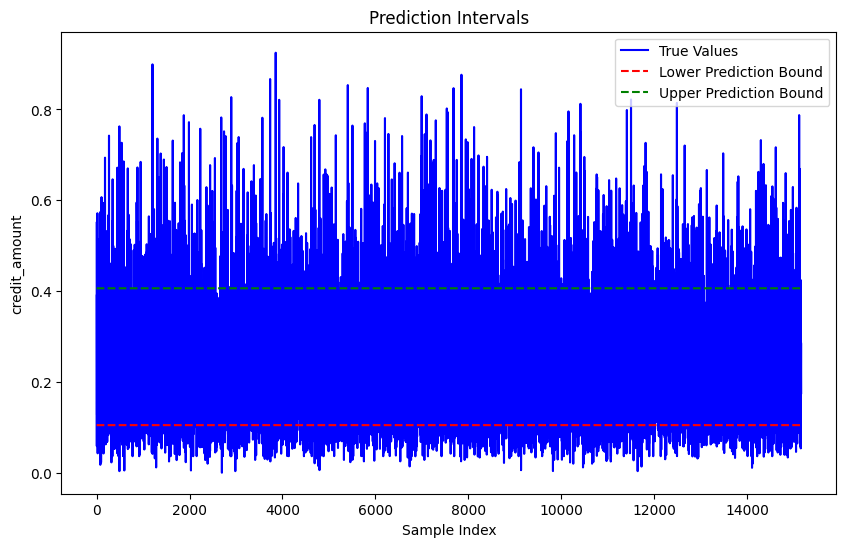

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(lower_pred, label='Lower Prediction Bound', color='red', linestyle='--')
plt.plot(upper_pred, label='Upper Prediction Bound', color='green', linestyle='--')

plt.xlabel('Sample Index')
plt.ylabel('credit_amount')
plt.title('Prediction Intervals')
plt.legend()

plt.show()

## 2. Prédiction Conforme pour la Régression

Nous allons implémenter une méthode de prédiction conforme pour générer des intervalles de prédiction à partir d'un modèle de régression.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def conformal_prediction(X, y, model, alpha=0.1, random_state=42):
    """
    conformal prediction for regression.

    Parameters:
    - X (array-like): Features (numpy array or pandas DataFrame).
    - y (array-like): Target variable (numpy array or pandas Series).
    - model (object): A regression model with fit() and predict() methods (e.g., scikit-learn regressor).
    - alpha (float): Significance level (1 - confidence level), default is 0.1 for 90% intervals.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - lower_bound (np.array): Lower bound of prediction intervals.
    - upper_bound (np.array): Upper bound of prediction intervals.
    - y_test (np.array): True target values for the test set.
    - y_test_pred (np.array): Predicted target values for the test set.
    - coverage (float): Coverage of the prediction interval.
    """
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=random_state)
    X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)
    model.fit(X_train, y_train)
    y_calib_pred = model.predict(X_calib)
    residuals = np.abs(y_calib - y_calib_pred)
    quantile = np.quantile(residuals, 1 - alpha)

    y_test_pred = model.predict(X_test)

    lower_bound = y_test_pred - quantile
    upper_bound = y_test_pred + quantile

    coverage = np.mean((y_test >= lower_bound) & (y_test <= upper_bound))

    return lower_bound, upper_bound, y_test, y_test_pred, coverage

def visualize_prediction_intervals(y_test, y_test_pred, lower_bound, upper_bound, title="Conformal Prediction Intervals"):
    """
    Visualizes conformal prediction intervals.

    Parameters:
    - y_test (array-like): True target values.
    - y_test_pred (array-like): Predicted target values.
    - lower_bound (array-like): Lower bounds of prediction intervals.
    - upper_bound (array-like): Upper bounds of prediction intervals.
    - title (str): Plot title.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label="True Values", color="blue", linewidth=0.8)
    plt.plot(range(len(y_test)), y_test_pred, label="Predicted Values", color="orange", linewidth=0.8)
    plt.fill_between(range(len(y_test)), lower_bound, upper_bound, color='green', alpha=0.2, label="Prediction Interval")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.title(title)
    plt.legend()
    plt.show()


Prediction interval coverage: 90.47%


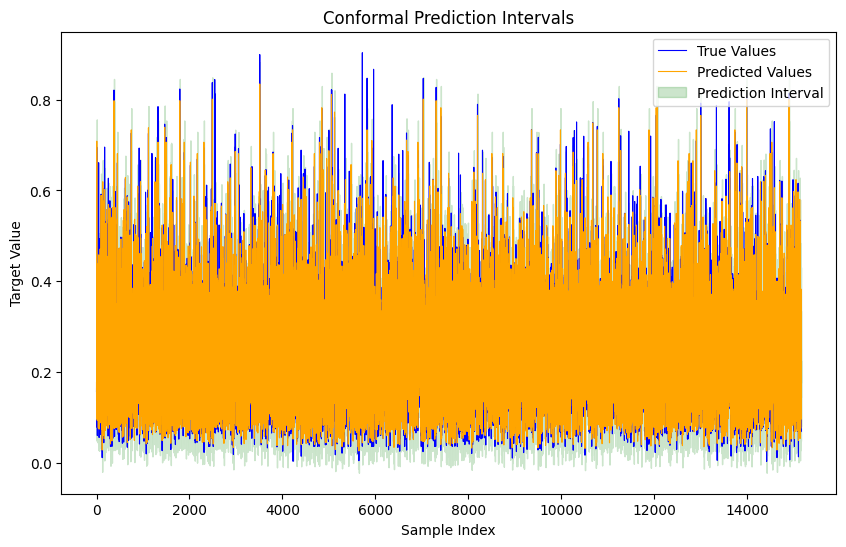

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X = train_regression
y = y_regression
model = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)
alpha = 0.1  # 90% confidence level
lower_bound, upper_bound, y_test, y_test_pred, coverage = conformal_prediction(X, y, model_gb, alpha)

print(f"Prediction interval coverage: {coverage * 100:.2f}%")
visualize_prediction_intervals(y_test, y_test_pred, lower_bound, upper_bound)

## 3. Prédiction Conforme pour la Classification

Nous allons maintenant implémenter des ensembles de prédiction conformes sur un modèle de classification en utilisant SCP, CV+, JK+ et FCP.


In [17]:
y_classif = data['Decision']
train_classif = data.drop('Decision', axis=1)
x_train, x_test, y_train, y_test = train_test_split(train_classif, y_classif, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

def SCP_classifier(X_train, y_train, X_test):
    """
    Méthode Split Conformal Prediction (SCP)
    """
    X_train_split, X_calib, y_train_split, y_calib = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model.fit(X_train_split, y_train_split)
    calib_probs = model.predict_proba(X_calib)
    calib_scores = 1 - calib_probs[np.arange(len(y_calib)), y_calib.astype(int)]
    # niveau de confiance souhaité
    alpha = 0.05
    quantile = np.quantile(calib_scores, 1 - alpha)
    
    def predict_set(X_test):
        test_probs = model.predict_proba(X_test)
        
        # ensembles de prédiction conformes
        prediction_sets = []
        for probs in test_probs:
            prediction_set = np.where(1 - probs <= quantile)[0]
            prediction_sets.append(prediction_set)
        
        return prediction_sets
    
    return predict_set

scp_predictor = SCP_classifier(x_train, y_train, x_test)
prediction_sets = scp_predictor(x_test)
print("Ensembles de prédiction conformes:", prediction_sets)
mean_confidence_prob = np.mean([np.mean(probs) for probs in prediction_sets])
print("Probabilité moyenne de confiance pour chaque prédiction (SCP):", mean_confidence_prob)

Ensembles de prédiction conformes: [array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([0, 1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), arra

In [28]:
from sklearn.model_selection import KFold

def CV_plus_classifier(X_train, y_train, X_test, model, n_splits=5):
    """
    Méthode Cross-Validation Plus (CV+)
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    nonconformity_scores = np.zeros(len(y_train))
    predictions = np.zeros((len(y_train), n_splits))
    
    for i, (train_index, calib_index) in enumerate(kf.split(X_train)):
        X_train_split, X_calib = X_train.iloc[train_index], X_train.iloc[calib_index]
        y_train_split, y_calib = y_train.iloc[train_index], y_train.iloc[calib_index]
        
        model.fit(X_train_split, y_train_split)
        calib_probs = model.predict_proba(X_calib)
        predictions[calib_index, i] = np.max(calib_probs, axis=1)
        nonconformity_scores[calib_index] = 1 - calib_probs[np.arange(len(y_calib)), y_calib.astype(int)]
    
    quantile = np.quantile(nonconformity_scores, 1 - 0.1)
    
    def predict_set(X_test):
        test_probs = model.predict_proba(X_test)
        prediction_sets = []
        for probs in test_probs:
            prediction_set = np.where(1 - probs <= quantile)[0]
            prediction_sets.append(prediction_set)
        return prediction_sets
    
    return predict_set

model = RandomForestClassifier()
cv_plus_predictor = CV_plus_classifier(x_train, y_train, x_test, model)
prediction_sets_cv_plus = cv_plus_predictor(x_test)
print("Ensembles de prédiction conformes (CV+):", prediction_sets_cv_plus)
mean_confidence_prob = np.mean([np.mean(probs) for probs in prediction_sets_cv_plus])
print("Probabilité moyenne de confiance pour chaque prédiction (CV+):", mean_confidence_prob)

Ensembles de prédiction conformes (CV+): [array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), arra

In [29]:
def JK_plus_classifier(X_train, y_train, X_test, model, n_splits=5):
    """
    Méthode Jackknife Plus (JK+)
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    nonconformity_scores = np.zeros(len(y_train))
    predictions = np.zeros((len(y_train), n_splits))
    
    for i, (train_index, calib_index) in enumerate(kf.split(X_train)):
        X_train_split, X_calib = X_train.iloc[train_index], X_train.iloc[calib_index]
        y_train_split, y_calib = y_train.iloc[train_index], y_train.iloc[calib_index]
        
        model.fit(X_train_split, y_train_split)
        calib_probs = model.predict_proba(X_calib)
        predictions[calib_index, i] = np.max(calib_probs, axis=1)
        nonconformity_scores[calib_index] = 1 - calib_probs[np.arange(len(y_calib)), y_calib.astype(int)]
    
    quantile = np.quantile(nonconformity_scores, 1 - 0.1)
    
    def predict_set(X_test):
        test_probs = model.predict_proba(X_test)
        prediction_sets = []
        for probs in test_probs:
            prediction_set = np.where(1 - probs <= quantile)[0]
            prediction_sets.append(prediction_set)
        return prediction_sets
    
    return predict_set

model = RandomForestClassifier()
jk_plus_predictor = JK_plus_classifier(x_train, y_train, x_test, model)
prediction_sets_jk_plus = jk_plus_predictor(x_test)
print("Ensembles de prédiction conformes (JK+):", prediction_sets_jk_plus)
mean_confidence_prob = np.mean([np.mean(probs) for probs in prediction_sets_jk_plus])
print("Probabilité moyenne de confiance pour chaque prédiction (JK+):", mean_confidence_prob)

Ensembles de prédiction conformes (JK+): [array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0]), array([1]), array([0, 1]), array([1]), array([1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([

In [33]:
def FCP_classifier(X_train, y_train, X_test, model, n_splits=5):
    """
    Méthode Full Conformal Prediction (FCP)
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    nonconformity_scores = np.zeros(len(y_train))
    predictions = np.zeros((len(y_train), n_splits))
    
    for i, (train_index, calib_index) in enumerate(kf.split(X_train)):
        X_train_split, X_calib = X_train.iloc[train_index], X_train.iloc[calib_index]
        y_train_split, y_calib = y_train.iloc[train_index], y_train.iloc[calib_index]
        
        model.fit(X_train_split, y_train_split)
        calib_probs = model.predict_proba(X_calib)
        predictions[calib_index, i] = np.max(calib_probs, axis=1)
        nonconformity_scores[calib_index] = 1 - calib_probs[np.arange(len(y_calib)), y_calib.astype(int)]
    
    quantile = np.quantile(nonconformity_scores, 1 - 0.1)
    
    def predict_set(X_test):
        test_probs = model.predict_proba(X_test)
        prediction_sets = []
        for probs in test_probs:
            prediction_set = np.where(1 - probs <= quantile)[0]
            prediction_sets.append(prediction_set)
        return prediction_sets
    
    return predict_set

model = RandomForestClassifier()
fcp_predictor = FCP_classifier(x_train, y_train, x_test, model)
prediction_sets_fcp = fcp_predictor(x_test)
print("Ensembles de prédiction conformes (FCP):", prediction_sets_fcp)
mean_confidence_prob = np.mean([np.mean(probs) for probs in prediction_sets_fcp])
print("Probabilité moyenne de confiance pour chaque prédiction (FCP):", mean_confidence_prob)

Ensembles de prédiction conformes (FCP): [array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([0]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([0]), array([0, 1]), array([0]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0, 1]), array([1]), array([1]), array([1])

In [31]:
from sklearn.metrics import accuracy_score

# Function to calculate accuracy for prediction sets
def calculate_accuracy(y_true, prediction_sets):
    correct_predictions = 0
    for true_label, prediction_set in zip(y_true, prediction_sets):
        if true_label in prediction_set:
            correct_predictions += 1
    return correct_predictions / len(y_true)

# Calculate accuracy for each algorithm
accuracy_scp = calculate_accuracy(y_test, prediction_sets)
accuracy_cv_plus = calculate_accuracy(y_test, prediction_sets_cv_plus)
accuracy_jk_plus = calculate_accuracy(y_test, prediction_sets_jk_plus)
accuracy_fcp = calculate_accuracy(y_test, prediction_sets_fcp)

print(f"Accuracy of SCP: {accuracy_scp * 100:.2f}%")
print(f"Accuracy of CV+: {accuracy_cv_plus * 100:.2f}%")
print(f"Accuracy of JK+: {accuracy_jk_plus * 100:.2f}%")
print(f"Accuracy of FCP: {accuracy_fcp * 100:.2f}%")

Accuracy of SCP: 95.03%
Accuracy of CV+: 90.29%
Accuracy of JK+: 90.32%
Accuracy of FCP: 89.95%


In [32]:
from sklearn.metrics import precision_score, recall_score

# Function to calculate precision and recall for prediction sets
def calculate_precision_recall(y_true, prediction_sets):
    y_pred = [max(pred_set) if len(pred_set) > 0 else 0 for pred_set in prediction_sets]
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return precision, recall

# Calculate precision and recall for each algorithm
precision_scp, recall_scp = calculate_precision_recall(y_test, prediction_sets)
precision_cv_plus, recall_cv_plus = calculate_precision_recall(y_test, prediction_sets_cv_plus)
precision_jk_plus, recall_jk_plus = calculate_precision_recall(y_test, prediction_sets_jk_plus)
precision_fcp, recall_fcp = calculate_precision_recall(y_test, prediction_sets_fcp)

print(f"Precision of SCP: {precision_scp * 100:.2f}%")
print(f"Recall of SCP: {recall_scp * 100:.2f}%")
print(f"Precision of CV+: {precision_cv_plus * 100:.2f}%")
print(f"Recall of CV+: {recall_cv_plus * 100:.2f}%")
print(f"Precision of JK+: {precision_jk_plus * 100:.2f}%")
print(f"Recall of JK+: {recall_jk_plus * 100:.2f}%")
print(f"Precision of FCP: {precision_fcp * 100:.2f}%")
print(f"Recall of FCP: {recall_fcp * 100:.2f}%")

Precision of SCP: 80.93%
Recall of SCP: 99.58%
Precision of CV+: 83.55%
Recall of CV+: 98.21%
Precision of JK+: 83.57%
Recall of JK+: 98.14%
Precision of FCP: 83.74%
Recall of FCP: 97.84%
